In [1]:
from __future__ import division, print_function, unicode_literals

import tensorflow as tf
import numpy as np
import math, random
import matplotlib.pyplot as plt
%matplotlib inline

def reset_graph(seed = 42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [2]:
reset_graph()
np.random.seed(42)
n_hidden1 = 40
n_hidden2 = 10
n_inputs = 1000
n_outputs = 1
train_split = .8
batch_size = 10
n_epochs = 1001

In [3]:
## Note: x vs y is the equation of a circle centered at zero, with radius = 2
# def function_to_learn(x, noise = False):
#     if (noise):
#         return 2 * np.sin(1 - x) + 0.0125 * np.random.randn(*x.shape)
#     else:
#         return 2 * np.sin(1 - x)
    
# def true_derivative(x):
#     return -2 * np.cos(1 - x)

In [4]:
def function_to_learn(x, noise = False):
    if (noise):
        return 1 + 2 * pow(x, 2) + 0.0125 * np.random.randn(*x.shape)
    else:
        return 1 + 2 * pow(x, 2)

def true_derivative(x):
    return 4 * x

In [5]:
noise = False
start_val = 0
end_val = 50
timediff = (end_val - start_val) / n_inputs
train_size = int(n_inputs * train_split)

timestamps = np.float32(np.arange(start_val, end_val + timediff, timediff)).reshape((n_inputs + 1, 1))

X_all = function_to_learn(timestamps, noise)

# Case 1: Use the exact derivative to train the system
y_all = true_derivative(timestamps)

# Case 2: Use the finite difference approximation to train the system
# y_all = np.zeros(n_inputs).reshape(n_inputs, 1)    
# for i in range(0, n_inputs):
#     y_all[i] = (X_all[i + 1] - X_all[i]) / (timestamps[i + 1] - timestamps[i])

index_train = np.random.choice(np.arange(n_inputs), train_size, replace = False)
X_train = X_all[index_train]
y_train = y_all[index_train]

index_validation = np.setdiff1d(np.arange(n_inputs), index_train)
np.random.shuffle(index_validation)
X_validation = X_all[index_validation]
y_validation = y_all[index_validation]

In [6]:
print(y_train.shape)

(800, 1)


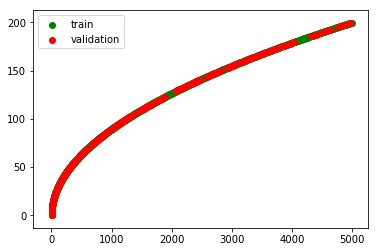

In [7]:
plt.figure(1)
plt.scatter(X_train, y_train, c = 'green', label = 'train')
plt.scatter(X_validation, y_validation, c = 'red', label = 'validation')
plt.legend()

In [8]:
X = tf.placeholder(tf.float32, shape = (None, 1), name = "X")
y = tf.placeholder(tf.float32, shape = None, name = "y")

In [9]:
with tf.name_scope("function_approximator"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation = tf.nn.relu, name = "hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation = tf.nn.relu, name = "hidden2")
    logits = tf.layers.dense(hidden1, n_outputs, name = "outputs")

In [10]:
with tf.name_scope("loss"):
    loss = tf.nn.l2_loss(logits - y)

In [11]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [12]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [13]:
with tf.name_scope("eval"):
    mse = tf.nn.l2_loss(logits - y_validation)

In [14]:
with tf.Session() as sess:
    init.run()
    errors = []
    for epoch in range(n_epochs):
        for start, end in zip(range(0, len(X_train), batch_size), range(batch_size, len(X_train), batch_size)):
            X_batch = X_train[start:end]
            y_batch = y_train[start:end]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        mse_validation = sess.run(mse, feed_dict = {X: X_validation})
        errors.append(mse_validation)
        if epoch % 100 == 0:
            print("Epoch:", epoch, "Validation accuracy:", mse_validation)

    save_path = saver.save(sess, "./my_model_final.ckpt")

Epoch: 0 Validation accuracy: 79141.8
Epoch: 100 Validation accuracy: 3323.99
Epoch: 200 Validation accuracy: 1402.16
Epoch: 300 Validation accuracy: 1136.6
Epoch: 400 Validation accuracy: 540.826
Epoch: 500 Validation accuracy: 593.652
Epoch: 600 Validation accuracy: 745.649
Epoch: 700 Validation accuracy: 3072.44
Epoch: 800 Validation accuracy: 281.489
Epoch: 900 Validation accuracy: 135.319
Epoch: 1000 Validation accuracy: 148.202


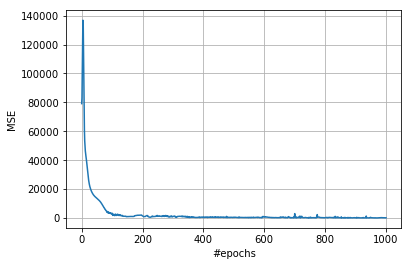

In [15]:
plt.plot(errors)
plt.xlabel('#epochs')
plt.ylabel('MSE')
plt.grid(True)